In [23]:
from rajvi_mapbox_api import MapboxAPI
import requests
from urllib.request import urlopen
import json
from shapely.geometry import shape, Polygon

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('default')
import geopandas as gpd
import geodatasets
import ast
from shapely import wkt
import folium

In [24]:
walkingBranchRadii = pd.read_csv('../library neighborhoods/completedWalkingNeighborhoodRadiiDF.csv')
populationDemographics = pd.read_csv('../data/clean/population_demographics.csv')
api = MapboxAPI() 

In [35]:
censusTracts = populationDemographics[['geoid','geometry']]

censusTracts = gpd.GeoDataFrame(
    censusTracts.loc[:, [c for c in censusTracts.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(censusTracts["geometry"]),
    crs="epsg:4326",
    )

In [26]:
walkingBranchRadii = gpd.GeoDataFrame(
    walkingBranchRadii.loc[:, [c for c in walkingBranchRadii.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(walkingBranchRadii["geometry"]),
    crs="epsg:4326",
    )

In [27]:
walkingBranchRadii = walkingBranchRadii.drop(columns = ['Unnamed: 0'])

In [28]:
walkingBranchRadii.head(3)

,BRANCH,LOCATION,LATITUDE,LONGITUDE,geometry
0,Albany Park,"(41.97557881655979, -87.71361314512697)",41.975579,-87.713613,"MULTIPOLYGON (((-87.72184 41.99035, -87.72261 ..."
1,Altgeld,"(41.65719847558056, -87.59883829075173)",41.657198,-87.598838,"POLYGON ((-87.59456 41.66420, -87.59460 41.664..."
2,Archer Heights,"(41.80110836194246, -87.72648385568911)",41.801108,-87.726484,"MULTIPOLYGON (((-87.71500 41.80877, -87.71492 ..."


In [29]:
combinedBranchRadii = gpd.GeoDataFrame({'BRANCH': ['All Branches'],'geometry': [walkingBranchRadii.loc[0,'geometry']]})
combinedBranchRadii

,BRANCH,geometry
0,All Branches,"MULTIPOLYGON (((-87.72184 41.99035, -87.72261 ..."


In [33]:
for i in range(walkingBranchRadii.shape[0] - 1):    
        oneLib = gpd.GeoDataFrame({'BRANCH': [walkingBranchRadii.loc[i+1,'BRANCH']],'geometry': [walkingBranchRadii.loc[i+1,'geometry']]})
        combinedBranchRadii = combinedBranchRadii.union(oneLib, align = True)

<Axes: >

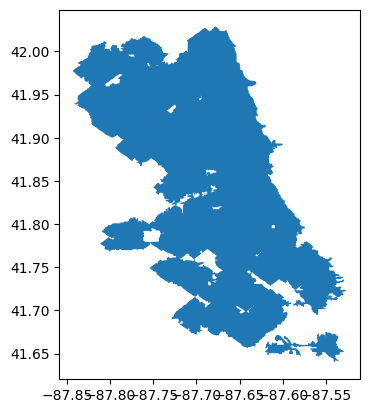

In [34]:
combinedBranchRadii.plot()

In [42]:
combinedCensusTracts = gpd.GeoDataFrame({'BRANCH': ['All Tracts'],'geometry': [censusTracts.loc[0,'geometry']]})

In [57]:
combinedCensusTracts

,BRANCH,geometry
0,All Tracts,"POLYGON ((-87.72096 41.68395, -87.72030 41.683..."


In [58]:
for i in range(censusTracts.shape[0] - 1):    
        oneTract = gpd.GeoDataFrame({'Tract': [censusTracts.loc[i,'geoid']],'geometry': [censusTracts.loc[i+1,'geometry']]})
        combinedCensusTracts = combinedCensusTracts.union(oneTract, align = True)

In [59]:
combinedCensusTracts

0    MULTIPOLYGON (((-87.80130 41.78652, -87.80130 ...
dtype: geometry

In [52]:
censusTracts.head(3)

,geoid,geometry
0,17031823303,"POLYGON ((-87.72096 41.68395, -87.72030 41.683..."
1,17031823304,"MULTIPOLYGON (((-87.72004 41.68397, -87.72006 ..."
2,17031740400,"POLYGON ((-87.72008 41.69127, -87.71937 41.691..."


<Axes: >

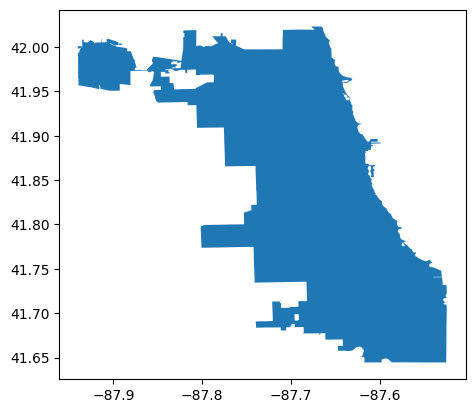

In [60]:
combinedCensusTracts.plot()

In [61]:

noLibNeighborhoods = gpd.GeoDataFrame({'Area': ['No Libs Neighborhood'],'geometry': [censusTracts.loc[0,'geometry']]})

In [62]:
noLib = combinedCensusTracts.difference(combinedBranchRadii)

In [63]:
noLibNeighborhoods['geometry'] = noLib

<Axes: >

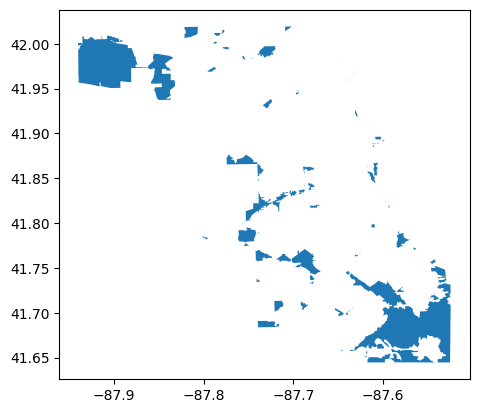

In [64]:
noLibNeighborhoods.plot()

<Axes: >

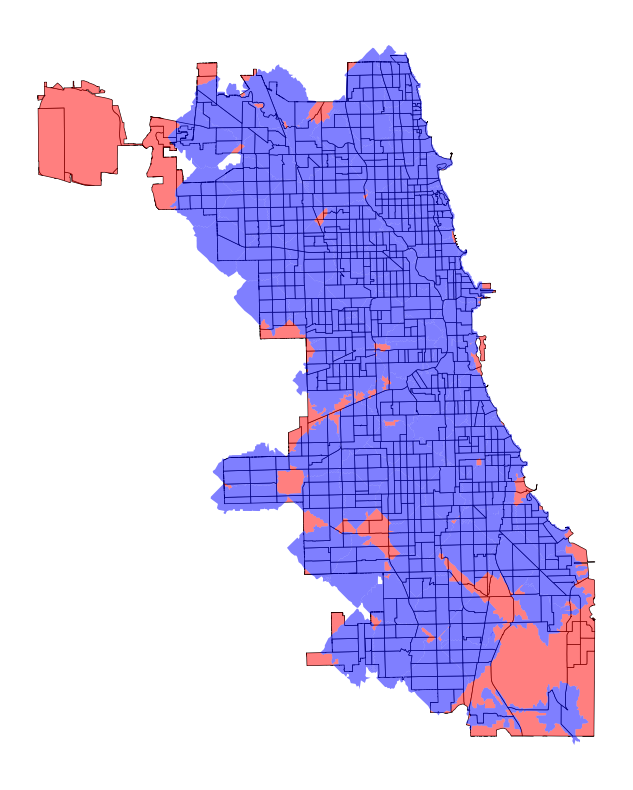

In [65]:
fig, ax = plt.subplots(1, figsize=(10, 10))
base = censusTracts.plot(ax=ax, color='white', edgecolor='black', linewidth = .5)
ax.axis('off')

noLibNeighborhoods.plot(ax=base, alpha = .5, color = 'red')
walkingBranchRadii.plot(ax=base, alpha = .5, color = 'blue')

In [67]:
noLibNeighborhoods.to_csv('../library neighborhoods/noLibNearby.csv')